<a href="https://colab.research.google.com/github/larrymoralez/ML_HW_-2/blob/master/ML_HW_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Import libraries
import numpy as np
from matplotlib import pyplot
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()



In [0]:
#split data into training and test data. Be careful to only run once or it will split data over and over again.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [0]:
#Set initial params
batch_size = 32
num_classes = 10
epochs = 5
RMS = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)



In [0]:
#Convert labels to categroical
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [64]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_14 (Activation)   (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4096)              0         
__________

In [0]:
#Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=RMS,
              metrics=['accuracy'])

In [66]:
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data=(x_val, y_val), shuffle = True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 130s 3ms/step - loss: 9.4662 - acc: 0.2314 - val_loss: 8.0402 - val_acc: 0.2832
Epoch 2/5
40000/40000 [==============================] - 128s 3ms/step - loss: 6.7292 - acc: 0.3079 - val_loss: 5.9805 - val_acc: 0.2989
Epoch 3/5
40000/40000 [==============================] - 127s 3ms/step - loss: 5.1203 - acc: 0.3394 - val_loss: 4.6708 - val_acc: 0.3469
Epoch 4/5
40000/40000 [==============================] - 128s 3ms/step - loss: 4.4547 - acc: 0.3693 - val_loss: 4.3456 - val_acc: 0.3608
Epoch 5/5
40000/40000 [==============================] - 128s 3ms/step - loss: 4.0323 - acc: 0.3956 - val_loss: 3.9585 - val_acc: 0.3870


In [70]:
val_loss, val_acc = model.evaluate(x_val, y_val, verbose=1)
print('Loss:', scores[0])
print('Accuracy:', scores[1])

10000/10000 [==============================] - 9s 877us/step
Loss: 3.9821304901123047
Accuracy: 0.3197


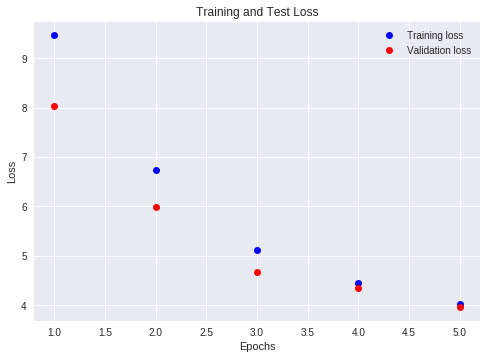

In [68]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'ro', label='Validation loss')
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

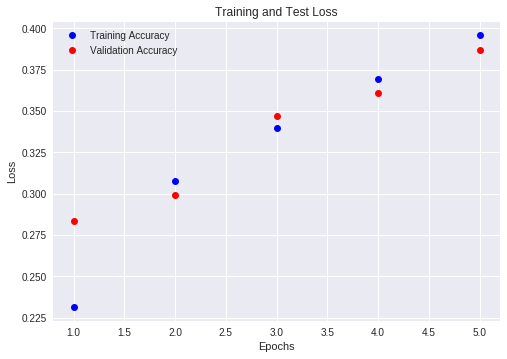

In [69]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs_range, acc, 'bo', label='Training Accuracy')
plt.plot(epochs_range, val_acc, 'ro', label='Validation Accuracy')
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()